## 角点检测
### Harris 角点检测
OpenCV 中 cv.cornerHarris()函数为 Harris 角点检测函数。
![](images/2023-08-14-11-30-35.png)

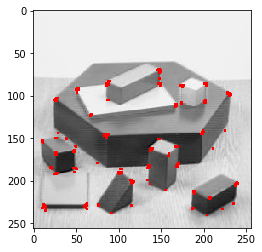

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('exp_images/corner-detection.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(np.float32(gray),2,3,0.04)
# 这里膨胀只是为了提高角点标注的清晰度，不重要。
dst = cv.dilate(dst,None)
# 设置一个阈值，将大于最大值百分之1的角点标记为红色。
img[dst>0.01*dst.max()] = [0,0,255]

plt.imshow(img[:,:,::-1])
plt.show()

### Shi-Tomasi角点检测器

Shi-Tomasi算法是harris算法的改进，因此计算速度更快。OpenCV中cv.goodFeaturesToTrack()函数可以完成该操作。

![](images/2023-08-14-11-34-47.png)

函数输出检测到的所有角点的x、y列表，下面代码将检测最多25个角点，指令水平系数为0.01，角点间最小距离为10：

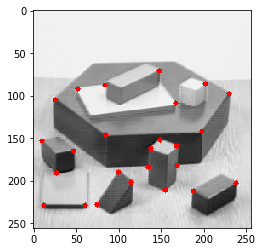

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('exp_images/corner-detection.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
 x,y = i.ravel()
 cv.circle(img,(x,y),3,255,-1)
plt.imshow(img)
plt.show()